# Plot geoweb services en Matplotlib..

Tratando de resolver el problema del etiquetado en matplotlib al hacer mapas, surgio la idea de poner consumir un wms para pasar dejar el proceso de los estilos y distribucion de las etiquetas del lado de geoserver, donde es mas manejable el asunto.., sin embargo queda ya abierta a cualquier servicio wms, y con el trabajo debido se podrian agragar mas geoservicios...

anoto aqui algunas ideas de lo que podria llegar a ser esta liberia trabajandola bien y con el feedback de la gente que pudiera consumirla

- ser una libreria que pueda plotear, es decir incorporar a las figuras de matplotlib, los geoservicios ya sea wms, wfs o wmts, hasta el momento la unica libreria que hace algo  parecido es contextily pero solo lo hace con las servicios de tipo xyz.. 

## ejemplo de insercion de un wms
es un wms que contiene las etiquetas de localidadades y municipios de mexico

(-99.65288585666377, 19.213420603878138, -99.52440981589237, 19.29067886562865)


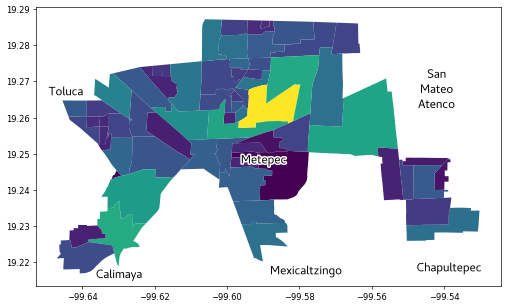

In [1]:
%matplotlib inline
import geopandas as gpd
from plotter_geoweb import wms
import matplotlib.pyplot as plt

df=gpd.GeoDataFrame.from_file("test_files/mun_15054.shp")

fig,ax=plt.subplots(figsize=(10,10),dpi=60)
ax.set_aspect('equal',anchor="N")
df.plot(column="pob_2010",ax=ax)

#preparar los parametros de consulta del mapa base
params_wms={"url":"http://localhost:8080/geoserver/base/wms","layers":["etiquetas_base"],"srs":"EPSG:4326","transparent":True}
wms.add_to_axes(ax,fig,str(df.crs),params_wms,zorder=2)


plt.show()

(-99.72898516686297, 19.199679041247084, -99.5191154611103, 19.48964446478194)


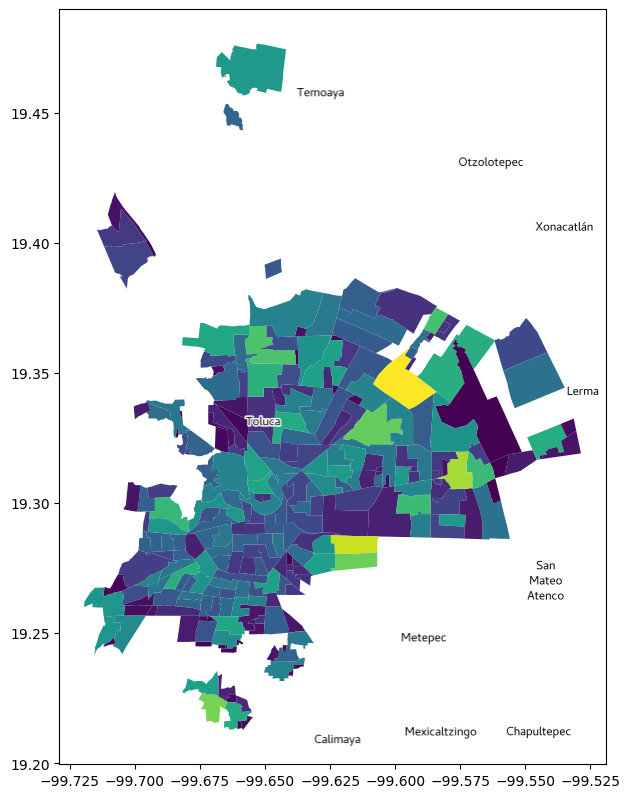

In [3]:
df2=gpd.GeoDataFrame.from_file("test_files/mun_15106.shp")

fig,ax=plt.subplots(figsize=(10,10),dpi=100)
ax.set_aspect('equal',anchor="N")
df2.plot(column="pob_2010",ax=ax)

#preparar los parametros de consulta del mapa base
params_wms={"url":"http://localhost:8080/geoserver/base/wms","layers":["etiquetas_base"],"srs":"EPSG:4326"}
wms.add_to_axes(ax,fig,str(df.crs),params_wms,zorder=2)


plt.show()

### sin que sea necesariamente un geodataframe

(-99.198650837, 19.433033062, -99.138839723, 19.497414918)


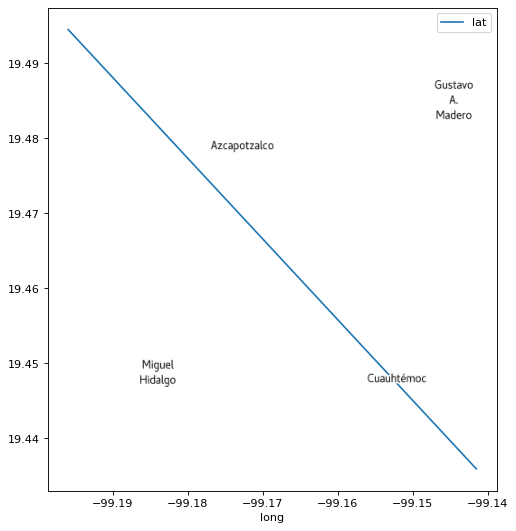

In [25]:
import pandas as pd 
df3=pd.DataFrame({"names":["punto1","punto2"],"lat":[19.43595951, 19.49448847],"long":[-99.14155841, -99.19593215]})
#plot al  dataframe
fig3,ax3=plt.subplots(figsize=(8,8),dpi=80)
ax.set_aspect("equal",adjustable="datalim")
df3.plot(x="long",y="lat",ax=ax3)
#agregando wms
params_wms={"url":"http://localhost:8080/geoserver/base/wms","layers":["etiquetas_base"],"srs":"EPSG:4326"}
wms.add_to_axes(ax3,fig3,"epsg:4326",params_wms,zorder=2)

plt.show()